# Clustering und Klassifikation

## Machine Learning

Trainingsdaten trainieren ein System, neue Datenpunkte korrekt zu bewerten

### Supervised vs. Unsupervised

Machine Learning Algorithmen lassen sich in zwei Klassen einteilen:
- Überwachtes Lernen
- Unüberwachtes Lernen

![Machine Learning](ML.jpg)

**Überwachtes Lernen** (supervised) liegt dann vor, wenn die Trainingsdaten mit Klassen annotiert sind: Jeder Datenpunkt gehört einer Klasse an. Es gibt eine genau definierte Anzahl an möglichen Klassen.

![Sunburn Data Set](sunburn.jpg)

Dies ist ein Beispiel für **Klassifikation**: Gegeben der Daten für jede Person, gehört sie zur Klasse **"Hat Sonnenbrand"**?

Von **Regression** spricht man, wenn das Ergebnis ein Wert auf einer **kontinuierlichen Skala** ist.

*Beispiel: Vorhersage von Mietpreisen nach Lage und Eigenschaften der Wohnung*

**Unüberwachtes Lernen** (unsupervised) liegt dann vor, wenn die Trainingsdaten nicht annotiert sind. Das Ziel ist es, Datenpunkte nach ihren Eigenschaften zu Gruppen zusammenzufügen. Dabei kann es eine vordefinierte Menge von Gruppen/**Cluster** geben, muss es aber nicht.

Unüberwachtes Lernen versucht also **Strukturen** in Daten zu finden. Ähnliche Datenpunkte werden zu **Clustern** zusammengefasst.

![Clustering Data Example](clustering_data.png)

Beispiel für ein Datenset mit 3 Clustern:

![Cluster Example](cluster_example.png)

## K-Means

Ünüberwachter Algorithmus, Clustering

**Grundidee**: Finde die Mitte der Cluster, indem iterativ immer bessere Mittelpunkte gefunden werden

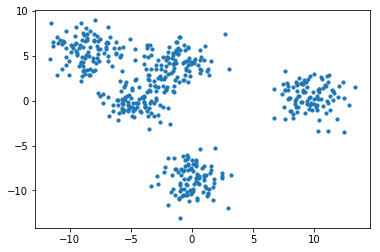

In [55]:
# Erschaffen uns beispielhaft Daten mit fünf Clustern
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X,_ = make_blobs(n_samples = 500, n_features = 2, centers = 5, cluster_std = 1.5, random_state = 7)
plt.scatter(X[:,0],X[:,1], s=10)
plt.draw()

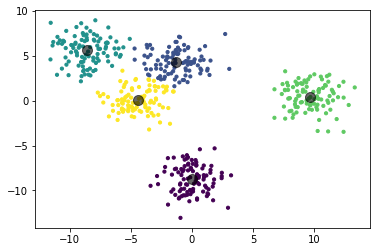

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)         # 'fit' trainiert das Modell mit den Trainingsdaten
y = kmeans.predict(X) # y sind die vorhergesagten 'Klassen' - hier also Cluster
centers = kmeans.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], c="black", s=100, alpha=0.6)
plt.draw()

Der K-Means Algorithmus:
```
Given: Dataset of objects in a vector space
Given: Number k of desired Clusters
Given: Maximum number of iterations i_max
---
centroids = {new set of k random points}
for i to i_max:
    assign all data points to closest centroid
    move centroids to the center of their assigned points
```

![KMeans Example](kmeans_example.png)

### Distanz

Um die Datenpunkte dem **nächsten** Mittelpunkt zuzuordnen, müssen wir die Distanz ausrechnen können.
Im $R^2$ nutzen wir hierfür die **Euklidische Distanz** zwischen zwei Punkten $p$ und $q$:

\begin{equation}
d(p,q) = \sqrt{(q_x - p_x)^2 + (q_y - p_y)^2}
\end{equation}

### Mittelpunkt
Den Mittelpunkt einer Menge $P$ von Punkten erhalten wir, indem wir für jede Achse den **Mittelwert** ausrechnen. Im $R^2$:

\begin{equation}
m(P) = (\frac{P_{1_x} + P_{2_x} + ... + P_{n_x}}{|P|},\frac{P_{1_y} + P_{2_y} + ... + P_{n_y}}{|P|})
\end{equation}
